# 2020.06.08_pca_baselines_again
-----
## As a result of deletign the baseline direction like a fucktard
Chain of baselines with 
*   pca features


### Version Info
* madmax: `13fea37` `03d8dcf`
* research: `3d47f5a` `80fb09a`

---
## History


#### 2020.06.07_pca_baselines

Chain of baselines with 
*   pca features


#### 2020.06.04_recap
Recap of all models to date
*   basic online model with rolling window (no technical features)
*  disjoint returns
*   online learning with Q and P-omega weights
* boosting / sequential residualization
*   technical features
*   pca features

In [28]:
# preamble
%alias_magic  nbagg matplotlib -p nbagg
%alias_magic  inline matplotlib -p inline
%load_ext memory_profiler
%load_ext line_profiler

from pylab import *
from madmax.api import *
mx = mx.reload()
mxtr = mxtr.reload()
plt.style.use('seaborn-whitegrid')

###################################################################
# Interactive configuration
# When running a config grid this will throw a FrozenException
# and the grid Config will be used
###################################################################
try:
    Config = mx.Configuration(
        name = 'etf_technical/2020.06.07_pca_baselines/',
        mode = 'interactive',
        hps = mx.HPSet(
            start = '20070101',
            end='20200501',
            INTS_PER_DAY = 13,        
        ),
        code = '2020.06.04_recap.ipynb',
        tb_port=6007,
    )
    disp('Running interactive configuration ', h=2)
except mx.Configuration.FrozenException:
    if Config.mode != 'grid':
        raise RuntimeError('An unexpected configruation encountered')
    disp('Running a grid configuration ', h=2)

device = 'cuda'
dtype = tr.float32
Config.start()

# to run run a grid of hyperparameters ...
####################################
# # hyperparameters
# mx.Config.hps = fr.HPSet(
# )
# mx.Config.code = ''
# # configs = []
# # for obs_weight in ['no_weight', 'dollar_weight', 'log_weight']:
# #     cfg = fr.Config.clone()
# #     cf
# #     cfg.hps = cfg.hps.clone( obs_weight=obs_weight )
# #     cfg.freeze()
# #     display_html( cfg )
# #     configs.append( cfg )
# # notebook = fr.Config.run_grid( configs, outfile=fr.Config.uri+'/../cadre_price_index.20200302 - weight_grid_results.ipynb', n_jobs=None )

Created `%nbagg` as an alias for `%matplotlib nbagg`.
Created `%inline` as an alias for `%matplotlib inline`.
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


<h1> Config etf_technical/2020.06.07_pca_baselines/ </h1>
<b> hash</b>: none </h4>
<b> mode </b>: interactive
<b> frozen </b>: False
<b> uri </b>: /home/fj/experiments/etf_technical/2020.06.07_pca_baselines/none
<b> tb_port </b>: 6007
<h3> Hyperparameters </h3>
HPSet(
		INTS_PER_DAY=13,
		end='20200501',
		start='20070101',
	)<h3> Code </h3>
<b> format </b>: .ipynb
<b> code </b> : /local/cloud/code/research/etf_technical/2020.06.04_recap.ipynb

## interactive global hyperparameters

In [29]:
# global  configruation
#######
if Config.mode == 'grid':
    raise mx.Config.FrozenException( 'running grid configruation - skipping')

hps = Config.hps

hps.universe = mx.HPSet(
    start = '20100101',
    end='20200401',
    min_count=2000,
    min_dollar_vol=1e5
)


hps.feature_set = mx.HPSet(
    unadj_prices=[
        'open_unadj_30min', 'high_unadj_30min', 'low_unadj_30min', 'close_unadj_30min', 'mid_unadj_30min',
        'log_open_unadj_30min', 'log_close_unadj_30min',
    ],
    adj_prices=[
        'open_adj_30min', 'high_adj_30min', 'low_adj_30min', 'close_adj_30min',
        'mid_adj_30min', 'mid_adj_0D.12h.vwap', 'mid_adj_2D.12h.vwap', 'mid_adj_5D.vwap',
        'open_adj_0D.12h', 'high_adj_0D.12h', 'low_adj_0D.12h',
        'open_adj_2D.12h', 'high_adj_2D.12h', 'low_adj_2D.12h',
        'open_adj_5D', 'high_adj_5D', 'low_adj_5D',
    ],
    rel_prices=[
        'rel_price_260', 'rel_price_780', 'rel_price_3276',
    ],
    volumes=[
        'volume_unadj_30min', 'dollar_volume_unadj_30min', 'avg_dollar_volume',
    ],
    log_volumes=[
        'log10_dollar_volume_30min', 'log10_dollar_volume_30min_resid',
    ],
    rel_volume=[
        'rel_dollar_volume_260', 'rel_dollar_volume_780',
        'rel_dollar_volume_3276',
    ],
    calendar=[
        'timeofday', 'cos1_timeofday', 'cos2_timeofday', 'cos4_timeofday',
        'dayofweek', 'cos1_dayofweek', 'cos2_dayofweek',
        'weekofmonth', 'cos1_weekofmonth', 'cos2_weekofmonth',
        'monthofquarter', 'cos1_monthofquarter', 'cos2_monthofquarter',
        'quarterofyear', 'cos1_quarterofyear', 'cos2_quarterofyear',
    ],
    lagging=[
        'lagrtn_adj_30min', 'lagrtn_adj_1hr', 'lagrtn_adj_1day',
        'lagrtn_adj_30min_resid',
    ],
    mkt=[
        'mkt_lagrtn_30min',
        'mkt_lagrtn_30min_260.rw_sd', 'mkt_lagrtn_30min_780.rw_sd', 'mkt_lagrtn_30min_3276.rw_sd',
    ],
    vol=[
        'lagrtn_adj_30min_260.rw_sd', 'lagrtn_adj_30min_780.rw_sd', 'lagrtn_adj_30min_3276.rw_sd',
        'lagrtn_adj_30min_resid_260.rw_sd', 'lagrtn_adj_30min_resid_780.rw_sd', 'lagrtn_adj_30min_resid_3276.rw_sd',
    ],
    zscores=[
        'lagrtn_adj_30min_260.rw_zscore', 'lagrtn_adj_30min_780.rw_zscore', 'lagrtn_adj_30min_3276.rw_zscore',
        'lagrtn_adj_30min_resid_260.rw_zscore', 'lagrtn_adj_30min_resid_780.rw_zscore',
        'lagrtn_adj_30min_resid_3276.rw_zscore',
    ],
    betas=[
        'lagrtn_adj_30min_1170.ew_beta', 'lagrtn_adj_30min_2340.ew_beta',
        'lagrtn_adj_30min_3276.ew_beta', 'lagrtn_adj_30min_6500.ew_beta',
    ],
    afacs=[ 'bw_afac_30min', 'fw_afac_30min' ],
    technical=[
        'true_range_30min', 'true_range_0D.12h', 'true_range_2D.12h', 'true_range_5D',
        'direction_30min', 'direction_0D.12h', 'direction_2D.12h', 'direction_5D',
        'delta_rtn_30min', 'delta_rtn_0D.12h', 'delta_rtn_2D.12h', 'delta_rtn_5D',
        'ttp_high_adj_0D.12h', 'ttp_high_adj_2D.12h', 'ttp_high_adj_5D',
        'ttp_low_adj_0D.12h', 'ttp_low_adj_2D.12h', 'ttp_low_adj_5D',    
    ],    
)

hps.leading_rtns = [
    'leadrtn_adj_30min', 'leadrtn_adj_1hr', 'leadrtn_adj_1day',
    'mkt_leadrtn_30min', 'mkt_leadrtn_1day',
    'leadrtn_adj_30min_disjoint.1', 'leadrtn_adj_30min_disjoint.2', 'leadrtn_adj_30min_disjoint.3',
]

hps.weights = ['valid_30min', 'weight', ]
    
baselines = OrderedDict()

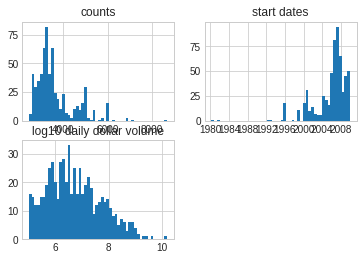

In [30]:
# identify the universe of ETFS
#############################################################
%inline
from research.etf_technical import etf_data_apr2020 as etfd; reload( etfd )

etf_stats = etfd.compute_etf_stats()
etf_stats = etf_stats[etf_stats.vendor=='kibot']
orig_len = len( etf_stats )
# drop etfs without enough history
etf_stats = etf_stats[(etf_stats['start'] <= hps.universe.start ) 
                      & (etf_stats['end'] > hps.universe.end ) 
                      & (etf_stats['n'] >= hps.universe.min_count)
                      & (etf_stats['daily_dollar_volume_adj'] >= hps.universe.min_dollar_vol ) ]

disp( 'after filtering', len( etf_stats ), 'symbols out of original ' ,orig_len )

etf_stats = (etf_stats
             .merge( etfd.all_etfs, how='left', left_on='symbol', right_on='Symbol' )
             .drop( columns=['Symbol', 'ETP Name', 'Leveraged / Inverse' ])
             .rename( columns={'Asset Class':'asset_class', 'Description':'name'} )
             .fillna( 'Not Specified')             
             .set_index('symbol')
            )
disp( etf_stats.groupby('asset_class').name.count() )

ax = subplot( 2,2, 1 )
etf_stats.n.hist(ax=ax, bins=50)
ax.set_title( 'counts')

ax = subplot( 2,2, 2 )
etf_stats.start.hist(ax=ax, bins=50)
ax.set_title( 'start dates')

ax = subplot( 2,2, 3 )
etf_stats.daily_dollar_volume_adj.log10().hist(ax=ax, bins=50)
ax.set_title( 'log10 daily dollar volume')

# this is the universe we will work with. 
# HERO has a massive returns spike in 2015.11.09 - which throws off residualization quite a bit.
hps.universe.symbols = sorted( etf_stats.index.values )


In [9]:
# build up the data and features
#############################################
%inline
from research.etf_technical import etf_data_apr2020 as etfd; reload( etfd )
from research.etf_technical import etf_technical_20200517 as etfrc; reload( etfrc )

# fetch the data as a dataarray
builder = etfd.BuildDataWithAfacs( symbols=hps.universe.symbols, mkt_only=True, start=hps.start ,).set( memoize=True )
builder.data = None
disp( 'builder BuildDataWithAfacs_7f79ef4bf  expected got', builder.hash() )
da = builder(  )
df = builder.output_meta

# hyperparams related to computing returns and residuals
hps.returns_hps = mx.HPSet(    
    price_windows=[ 24*1, 24*5, 24*10],
    beta_halflifes=[13 * 90, 13 * 180, 13 * 252, 13*500],
    dollar_volume_window=13*180,
    ema_halflifes=[20 * 13, 60 * 13, 252 * 13],
    resid_halflife=13,
    
)
# compute log-returns, log-dollar-volume, betas, residual returns and clean up the data
rtn_computer = etfrc.compute_returns_and_betas( 
    start=hps.start, end=None,     
    dollar_volume_window=hps.returns_hps.dollar_volume_window, 
    price_windows = hps.returns_hps.price_windows,
    beta_halflifes=hps.returns_hps.beta_halflifes, 
    resid_halflife=None,    
) 
rtn_computer.data = builder
disp( 'expected compute_returns_and_betas_9280a30dd got', rtn_computer.hash(), h=4, color='teal' )

# add relative price and relative volume features
rel_price_and_vols = etfrc.add_relative_price_and_volumes( emas=hps.returns_hps.ema_halflifes )
rel_price_and_vols.data = rtn_computer
disp( 'expected add_relative_price_and_volumes_a65da371a got', rel_price_and_vols.hash(), h=4, color='teal' )

# add volatility and calendar features
add_vols = etfrc.add_volatilities( emas=hps.returns_hps.ema_halflifes )
add_vols.data = rel_price_and_vols
disp( 'expected add_volatilities_77ca914f0 got', add_vols.hash(), h=4, color='teal' )

# add disjoint returns
disjoint_returns= etfrc.add_dijoint_returns( lags=(1, 2, 3) )
disjoint_returns.data = add_vols
disjoint_returns.features = 'leadrtn_adj_30min'
disp( 'expected add_dijoint_returns_ed1f196d1 got', disjoint_returns.hash(), h=4, color='teal' )
da = disjoint_returns(   )

# OnlineRunner_854f955c7 
### Online pca (small kappa), factors as features and as ortho_features. No residualizaiton.(on top of OnlineRunner_6c9fbc725 and OnlineRunner_73844bf6b)



,,n,finite_frac,tilt,pmSR,ic,r2,tstat,DK_60,ac_1,ac_2,ac_13
returns,lag,,,,,,,,,,,
leadrtn_adj_30min,NaN,24916688,0.845909,-0.324819,0.711049,0.012660,0.000160,57.375320,3.376464,0.506458,0.490251,0.461316
leadrtn_adj_1hr,NaN,24916688,0.845886,-0.324819,0.607087,0.006632,0.000044,30.732443,1.901269,0.506458,0.490251,0.461316
leadrtn_adj_30min,1.0,24916688,0.845897,-0.903141,0.112402,-0.003211,0.000010,-14.678712,-1.132842,0.511104,0.497117,0.464818
leadrtn_adj_1hr,1.0,24916688,0.845874,-0.903141,0.171665,0.002128,0.000005,10.343089,1.034211,0.511104,0.497117,0.464818
leadrtn_adj_30min,2.0,24916688,0.845885,-0.936142,0.148183,0.006849,0.000047,31.131121,2.312913,0.511574,0.497589,0.465175
leadrtn_adj_1hr,2.0,24916688,0.845862,-0.936142,0.169416,0.001843,0.000003,8.671050,0.653419,0.511574,0.497589,0.465175


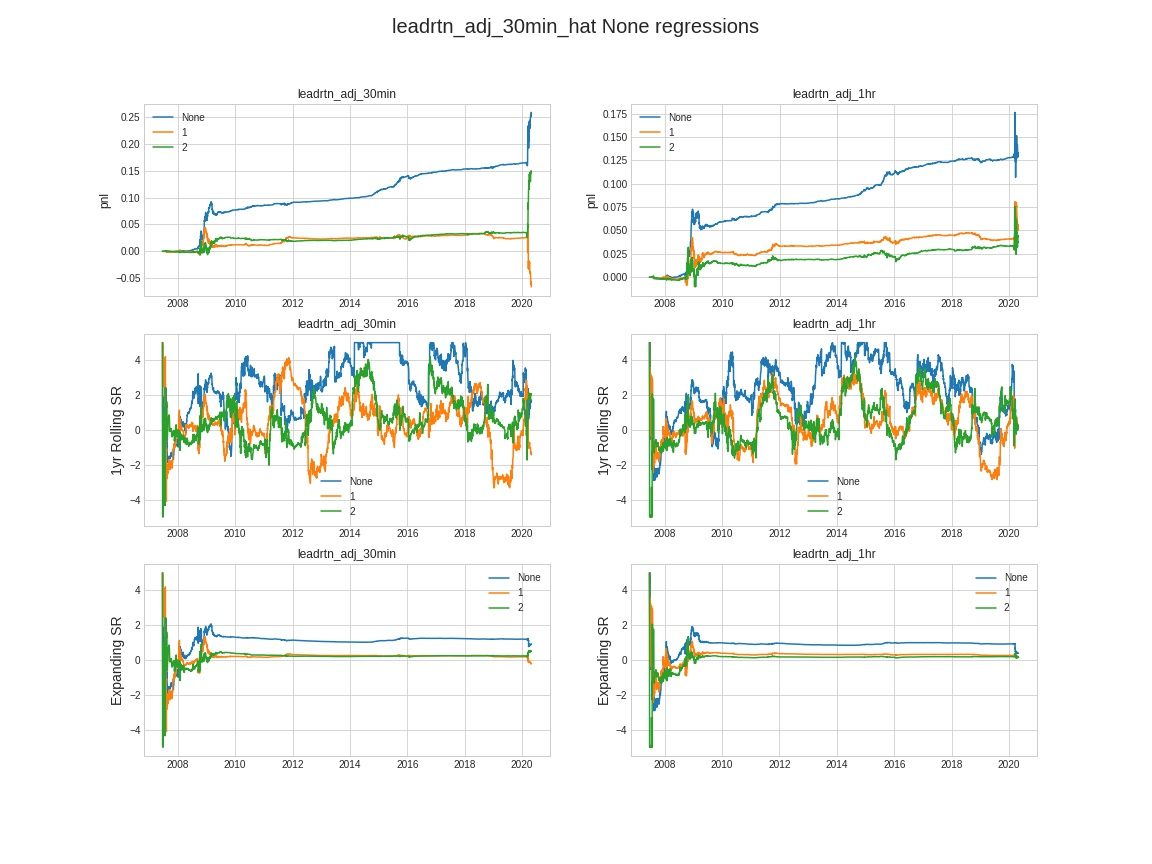

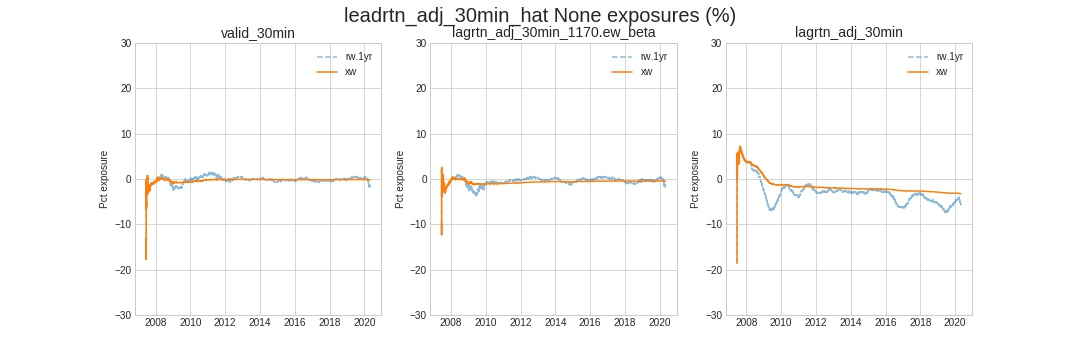

,,n,finite_frac,tilt,pmSR,ic,r2,tstat,DK_60,ac_1,ac_2,ac_13
returns,lag,,,,,,,,,,,
leadrtn_adj_30min,NaN,24916688,0.845909,0.076505,0.555746,0.009003,0.000081,40.591496,2.130791,0.482877,0.495281,0.455981
leadrtn_adj_1hr,NaN,24916688,0.845886,0.076505,0.471510,0.003211,0.000010,15.164953,0.764726,0.482877,0.495281,0.455981
leadrtn_adj_30min,1.0,24916688,0.845897,-1.005683,0.093594,-0.004462,0.000020,-20.527859,-1.345138,0.486260,0.500771,0.458538
leadrtn_adj_1hr,1.0,24916688,0.845874,-1.005683,0.121631,0.001761,0.000003,8.152917,0.682577,0.486260,0.500771,0.458538
leadrtn_adj_30min,2.0,24916688,0.845885,-1.068618,0.079725,0.007072,0.000050,31.815945,2.013257,0.486728,0.501500,0.458589
leadrtn_adj_1hr,2.0,24916688,0.845862,-1.068618,0.047585,0.001171,0.000001,6.104511,0.398423,0.486728,0.501500,0.458589


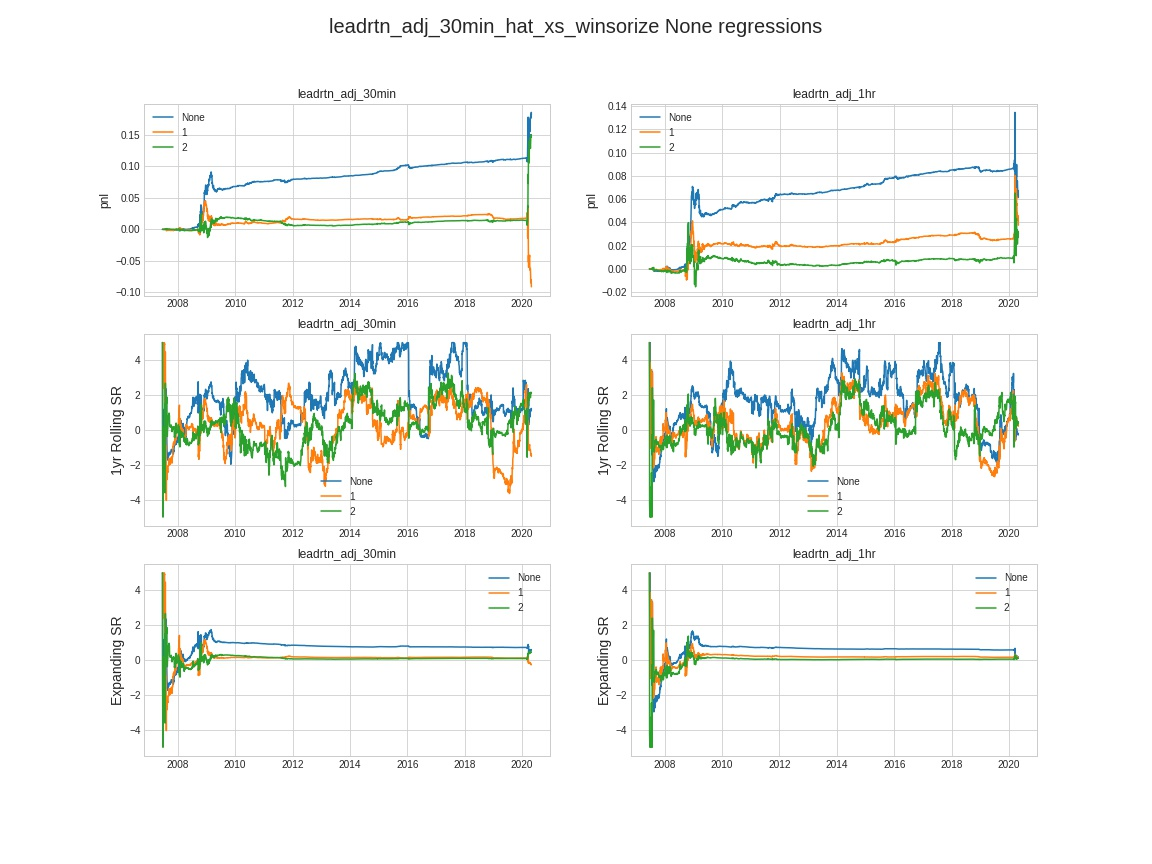

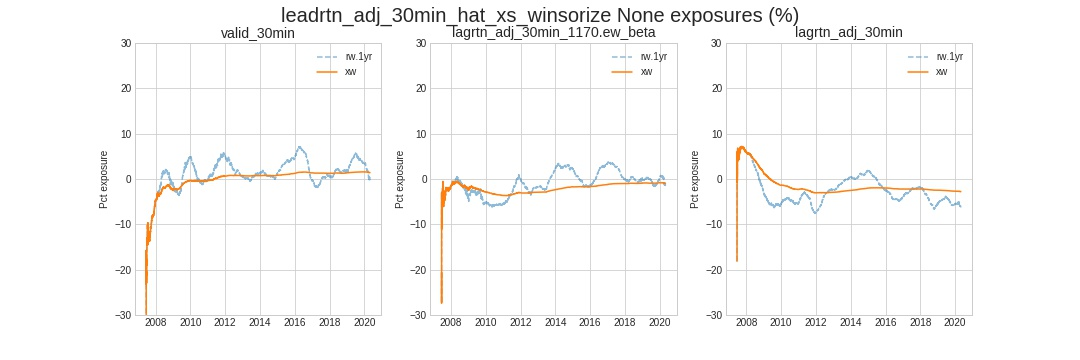

,,n,finite_frac,tilt,pmSR,ic,r2,tstat,DK_60,ac_1,ac_2,ac_13
returns,lag,,,,,,,,,,,
leadrtn_adj_30min,NaN,24916688,0.845909,1.484014e-11,1.017841,0.009935,9.870529e-05,44.761318,9.877004,0.624016,0.586206,0.566593
leadrtn_adj_1hr,NaN,24916688,0.845886,1.484014e-11,0.860082,0.007736,5.984306e-05,35.399925,8.838082,0.624016,0.586206,0.566593
leadrtn_adj_30min,1.0,24916688,0.845897,-3.107819e-02,0.160048,0.000880,7.748604e-07,4.272181,1.241834,0.627971,0.595013,0.572800
leadrtn_adj_1hr,1.0,24916688,0.845874,-3.107819e-02,0.219766,0.001638,2.682209e-06,8.285375,2.240591,0.627971,0.595013,0.572800
leadrtn_adj_30min,2.0,24916688,0.845885,-3.280967e-02,0.184922,0.002043,4.172325e-06,9.218644,2.560505,0.628688,0.596110,0.573515
leadrtn_adj_1hr,2.0,24916688,0.845862,-3.280967e-02,0.230915,0.002251,5.066395e-06,10.304932,2.660382,0.628688,0.596110,0.573515


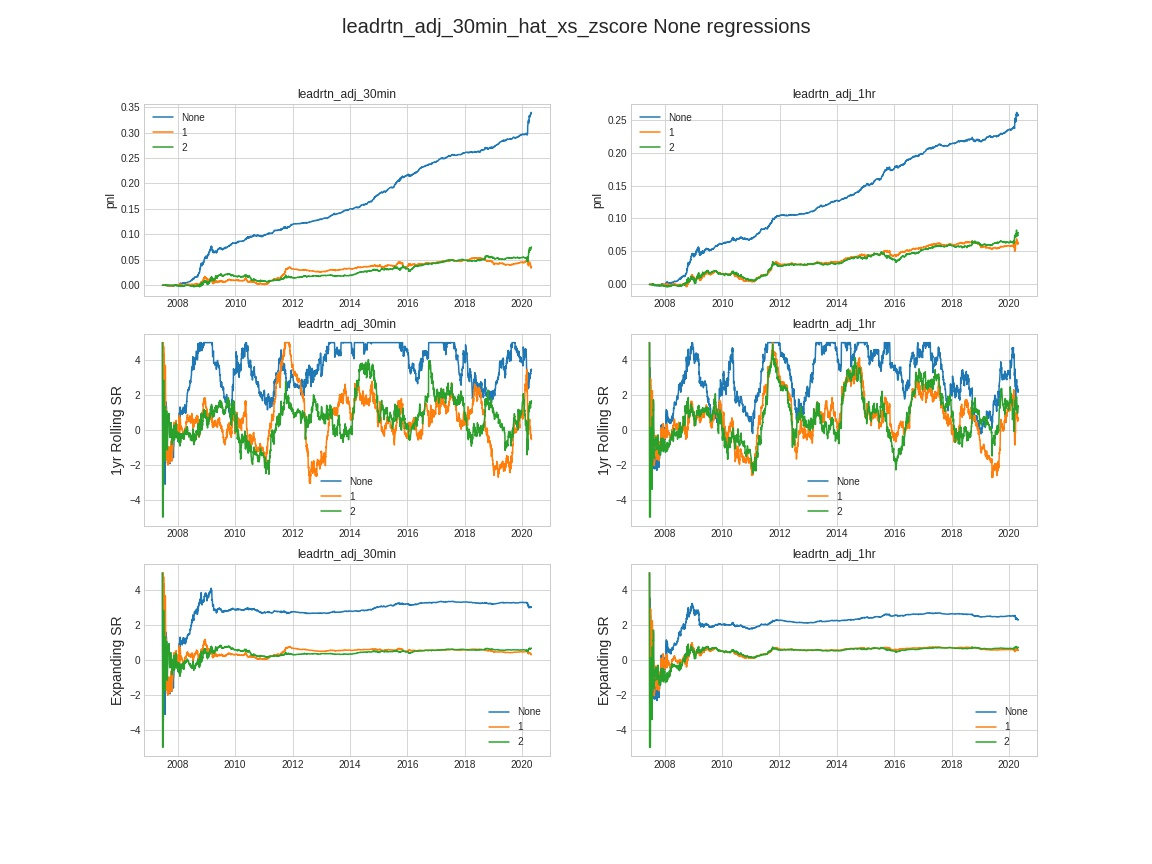

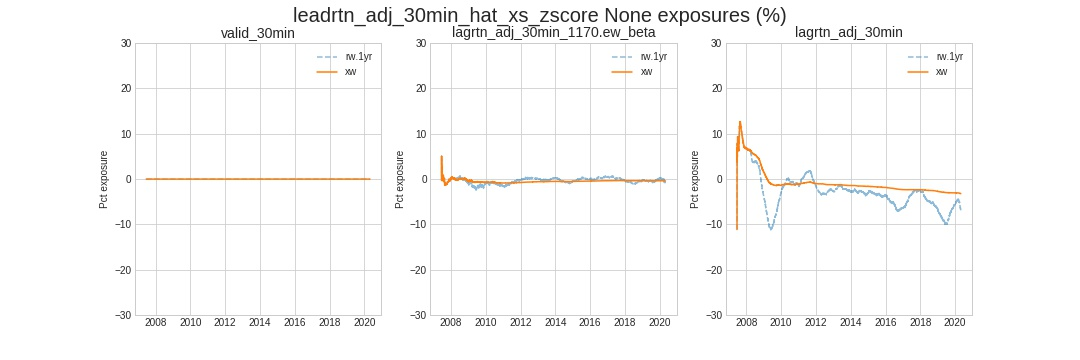

,,n,finite_frac,tilt,pmSR,ic,r2,tstat,DK_60,ac_1,ac_2,ac_13
returns,lag,,,,,,,,,,,
leadrtn_adj_30min,NaN,24916688,0.845909,4.578722e-11,1.022438,0.007608,5.787611e-05,33.788219,8.608183,0.674604,0.646177,0.623618
leadrtn_adj_1hr,NaN,24916688,0.845886,4.578722e-11,0.847450,0.005746,3.302097e-05,26.649378,7.410033,0.674604,0.646177,0.623618
leadrtn_adj_30min,1.0,24916688,0.845897,-4.058202e-02,0.147702,0.000000,0.000000e+00,2.597246,0.888407,0.672344,0.650589,0.626146
leadrtn_adj_1hr,1.0,24916688,0.845874,-4.058202e-02,0.173825,0.000977,9.536743e-07,5.512096,1.728600,0.672344,0.650589,0.626146
leadrtn_adj_30min,2.0,24916688,0.845885,-4.279012e-02,0.117315,0.001119,1.251698e-06,5.155029,1.648661,0.672831,0.651318,0.626547
leadrtn_adj_1hr,2.0,24916688,0.845862,-4.279012e-02,0.119464,0.000977,9.536743e-07,5.517499,1.578917,0.672831,0.651318,0.626547


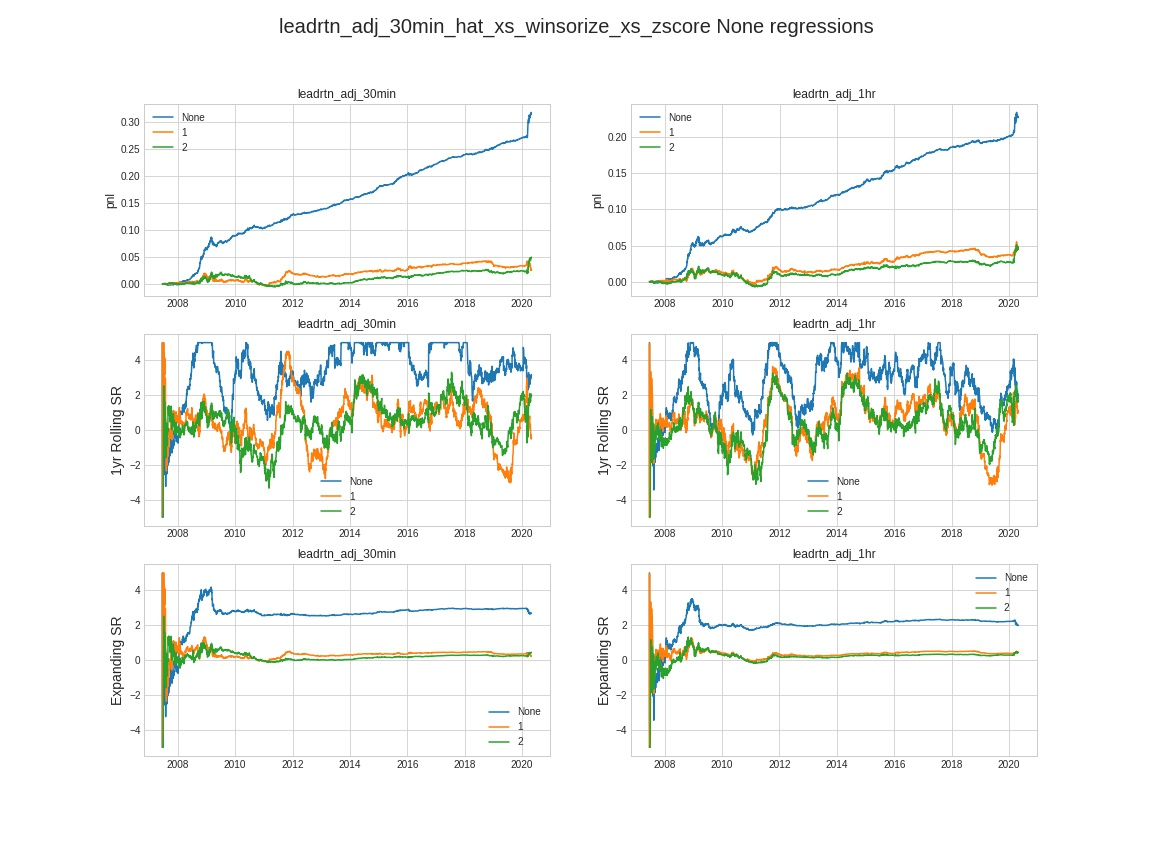

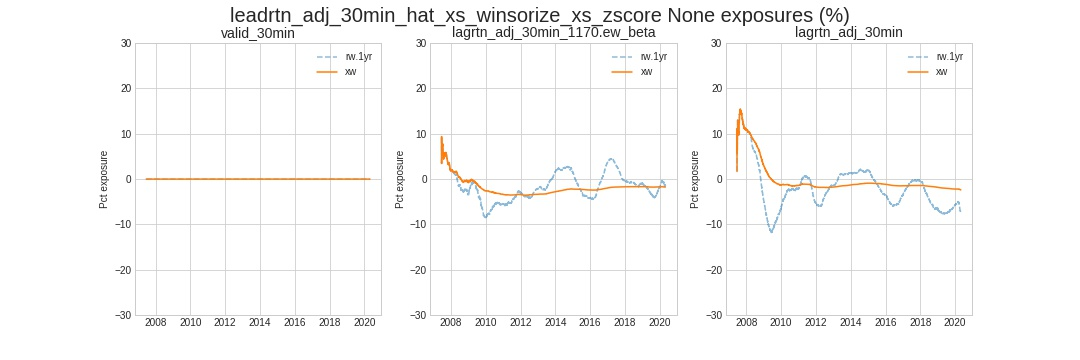

,leadrtn_adj_30min_hat,leadrtn_adj_30min_hat_xs_winsorize,leadrtn_adj_30min_hat_xs_zscore,leadrtn_adj_30min_hat_xs_winsorize_xs_zscore
leadrtn_adj_30min_hat,1.000000,0.867320,0.749078,0.644747
leadrtn_adj_30min_hat_xs_winsorize,0.867320,1.000000,0.611774,0.701591
leadrtn_adj_30min_hat_xs_zscore,0.749078,0.611774,1.000000,0.866763
leadrtn_adj_30min_hat_xs_winsorize_xs_zscore,0.644747,0.701591,0.866763,1.000000


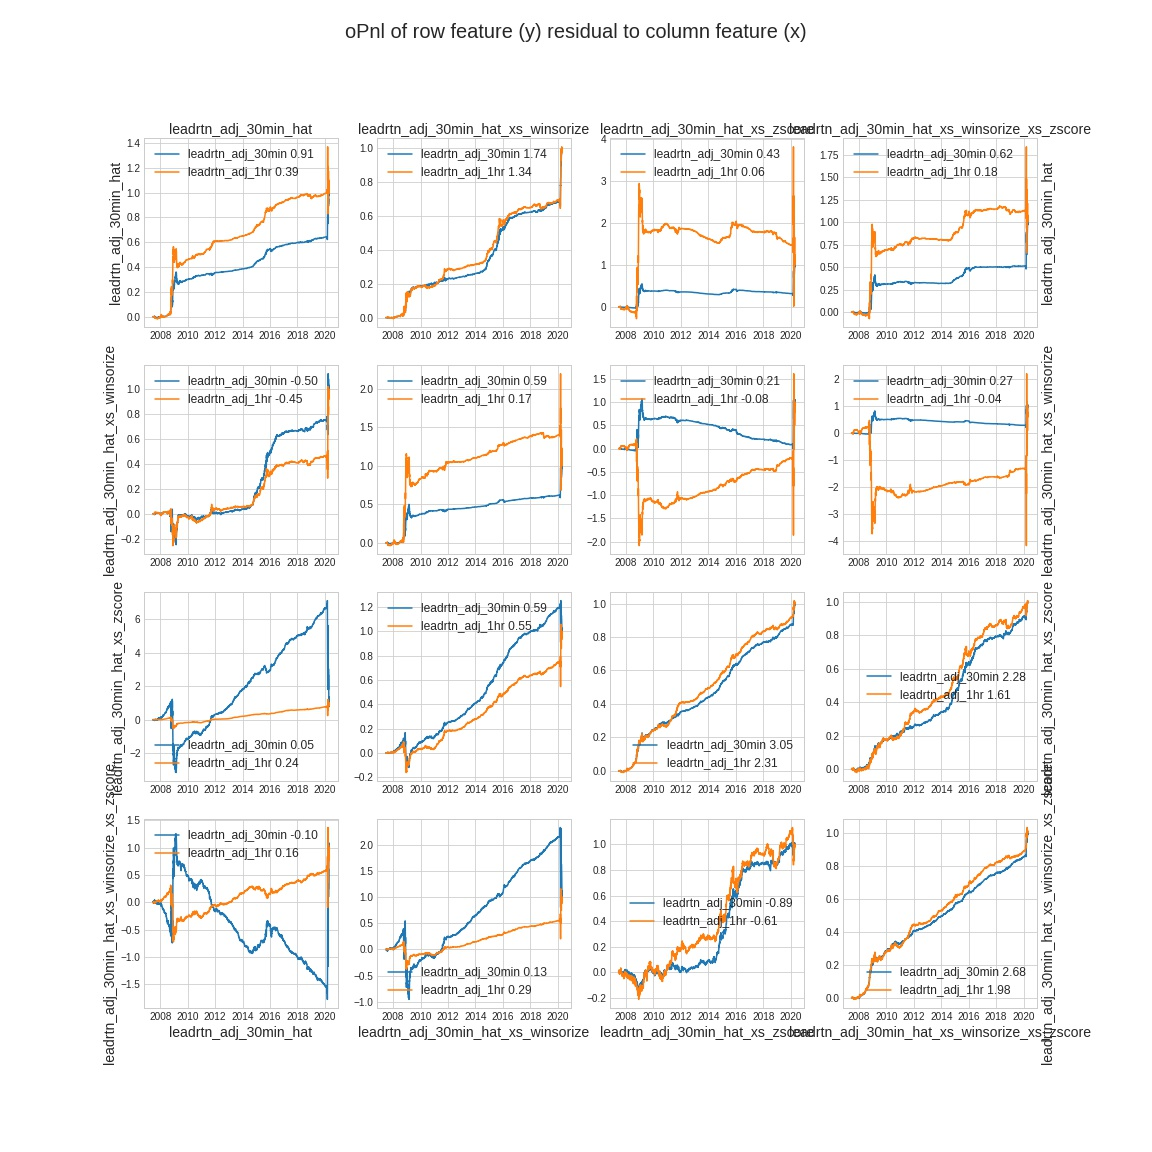

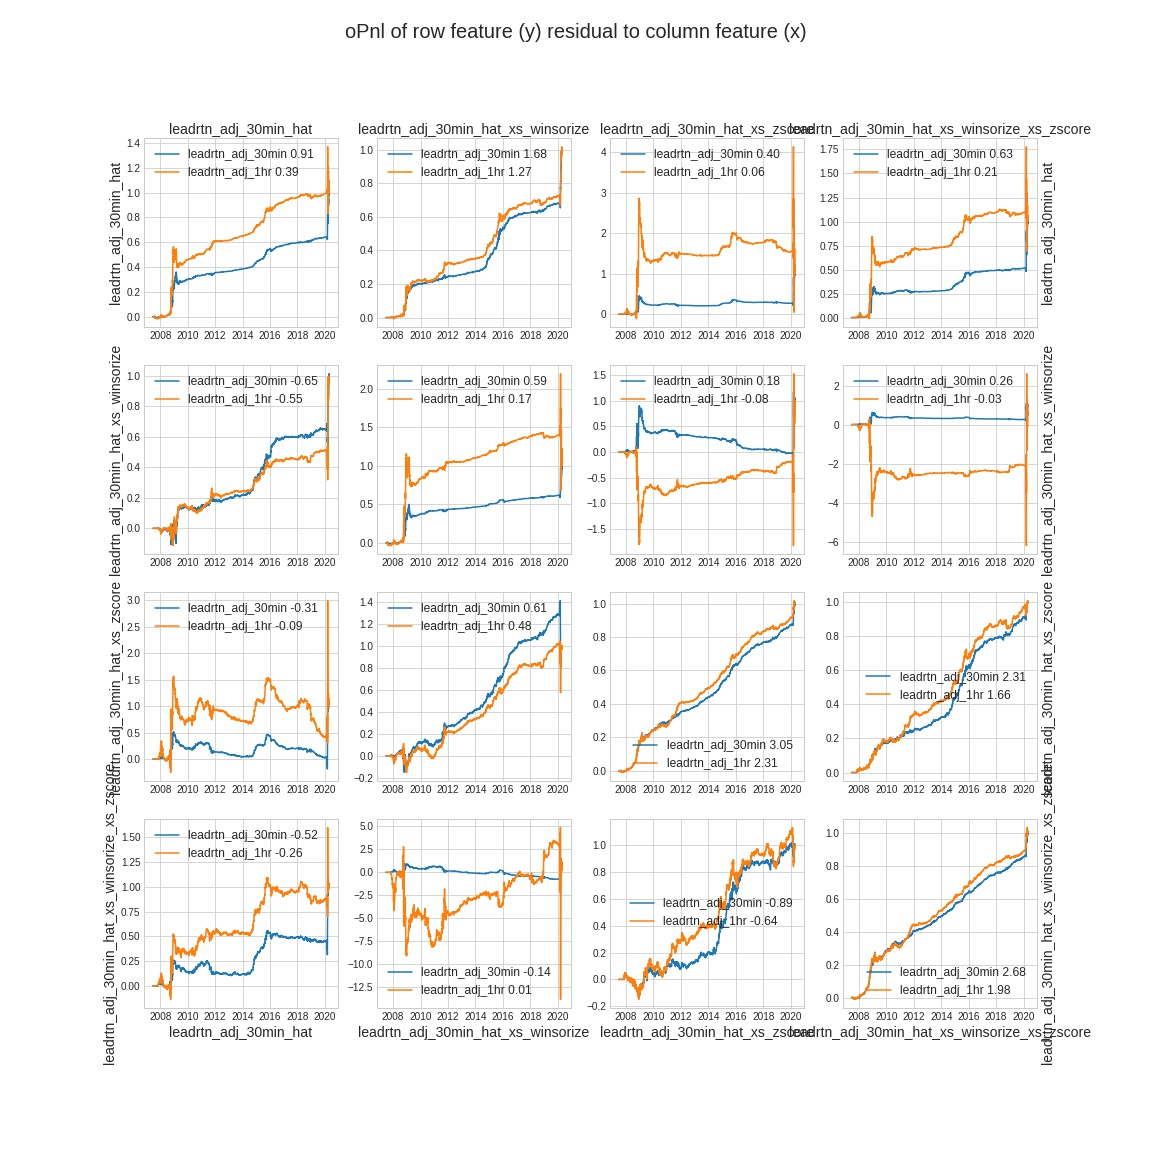

/home/fj/anaconda3/lib/python3.7/site-packages/scipy/io/netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


,index,0
dataset,,
A,leadrtn_adj_30min_hat_xs_winsorize_xs_zscore,A_0
B,ensemble_forecast,B_0


,A_0,B_0
A_0,1.000000,0.617946
B_0,0.617946,1.000000


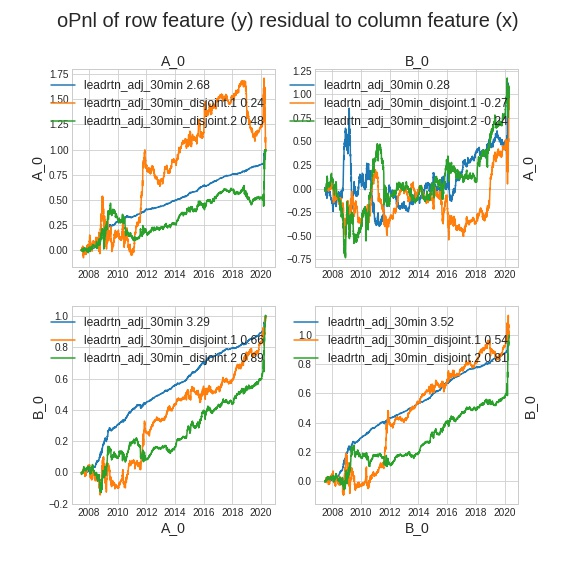

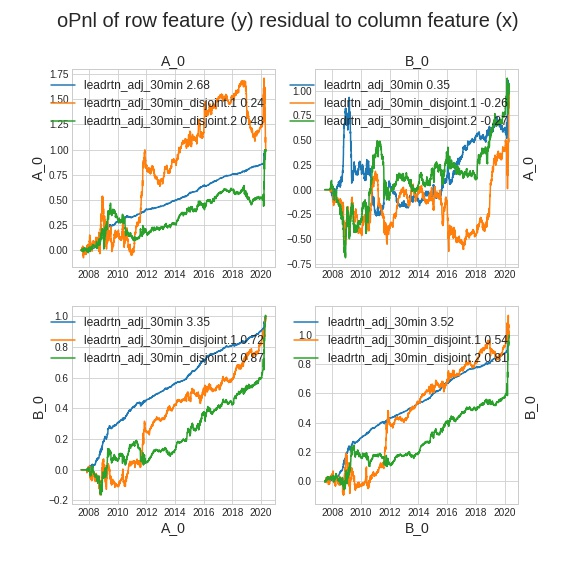

{'feature_map':                                                 index    0
 dataset                                                   
 A        leadrtn_adj_30min_hat_xs_winsorize_xs_zscore  A_0
 B                                   ensemble_forecast  B_0,
 'fcst_corrs':           A_0       B_0
 A_0  1.000000  0.617946
 B_0  0.617946  1.000000,
 'static_osrs': x                                      A_0       B_0
 y   tgt                                             
 A_0 leadrtn_adj_30min             2.684280  0.278279
     leadrtn_adj_30min_disjoint.1  0.244654 -0.268938
     leadrtn_adj_30min_disjoint.2  0.480656 -0.238015
 B_0 leadrtn_adj_30min             3.292999  3.518402
     leadrtn_adj_30min_disjoint.1  0.660627  0.543543
     leadrtn_adj_30min_disjoint.2  0.891311  0.813032,
 'static_opnl': <IPython.core.display.Image object>,
 'roll_osrs': x                                      A_0       B_0
 y   tgt                                             
 A_0 leadrtn_adj_30min          

In [18]:
# OnlineRunner_854f955c7
##############
%inline

BASELINE_NAME = 'OnlineRunner_854f955c7'
BASELINE_NOTES =  'Online pca (small kappa), factors as features and as ortho_features. No residualizaiton.(on top of OnlineRunner_6c9fbc725 and OnlineRunner_73844bf6b)'
make_baseline = True

disp( BASELINE_NAME, h=1 )
disp( BASELINE_NOTES, h=3 )    

# this baseline is borked because I deleted teh upstream baseline files ...
if False:

    from research.etf_technical import online_runner as reor; reload( reor )

    # Use the output of 2020.06.04 output of recap. It has 
    ref_baseline = mx.Baseline.load( 'EnsembleForecasts_f4d5d4527' )
    data = ref_baseline
    data = mx.RenameFeatures( 
        new_features=[f'forecast_EnsembleForecasts_f4d5d4527'] 
    ).set( data=ref_baseline, features=['ensemble_forecast'] )

    baseline_hps=mx.HPSet(
        online_hps = mx.HPSet(
            # stuff related to pre and post processing
            start=hps.start,
            end=hps.end,
            symbol=None,
            winsorize_target=False, #winsorize returns
            winsorize_features=0.01, # winsorize features
            demean_features=False,
            normalize_features=False,
            regression_exposures=['valid_30min', 'lagrtn_adj_30min_1170.ew_beta', 'lagrtn_adj_30min'],
            regression_targets=['leadrtn_adj_30min', 'leadrtn_adj_30min_disjoint.1', 'leadrtn_adj_30min_disjoint.2'],
            # the feature sets
            features=sorted( set(
                []
                + ['open_unadj_30min', 'log_open_unadj_30min', 'lagrtn_adj_30min_resid', ]
                + hps.feature_set.lagging
                + hps.feature_set.vol
                + hps.feature_set.log_volumes
                # + hps.feature_set.calendar
                + hps.feature_set.mkt
                + hps.feature_set.betas
                # + hps.feature_set.technical
                # + hps.feature_set.afacs
            ) ),
            targets=(
                ['leadrtn_adj_30min'] 
                #+['leadrtn_adj_30min_disjoint.1', 'leadrtn_adj_30min_disjoint.2'],
            ),
            weight='valid_30min',
            # stuff related to online learning
            lookahead=2,
            ridge=1e-5,
            hl_1=None,
            hl_2=None,
            lr=500,
            kappa=2,  # util penalty
            tv=None,  # {1:1, 2:1, 13:1e-1},
            ortho=2,
            ortho_hl=13,
            # feautres to orthogonal out
            ortho_features=(
                []                
                + ['valid_30min', 'lagrtn_adj_30min', 'lagrtn_adj_1day']  # tilt and mean revrsion        
                + hps.feature_set.betas # market
                # other baselines
                #+ ['leadrtn_adj_30min_hat_xs_winsorize_xs_zscore_OnlineRunner_e7d983f5e',  ] 
            ),
            algo='mbprox',
            batch_size=5000,    
            # stuff related to sid weighting
            use_omega=False,
            omega_lr=10,
            omega_ridge=0,
            omega_shift=0.1,    
            # the transformer
            transformer=mx.HPSet( pre_normalize=True, quadratic=True, post_normalize=True, ema_halflifes=[13 * 5, 13 * 20, 13 * 40], ),
        ),
        pca_hps = mx.HPSet(
            targets=['lagrtn_adj_30min', 'lagrtn_adj_1day'],
            weight=['weight'],
            halflife=30 * 13,
            rank=5,
            kappa=None,
            ortho=1e-1,
            tv=None,
            ortho_halflife=None,    
            ortho_features=['valid_30min'] + hps.feature_set.betas, # take out tilt and market
            ridge=1e-6,
            batch_size=5000,
            factors_as_features=True, # use the pca factors as features
            factors_as_ortho=True, # use the factors as orthogonal features
            eigens_as_features=False, # the eigvenvalues as features
        )
    )

    disp( mx.tensorboard.start_server( 6007 ) )
    disp( mx.tensorboard.start( clear=True ) )    
    # runner = reor.online_pipeline( data=data, online_hps=baseline_hps.online_hps, pca_hps=baseline_hps.pca_hps, memoize=True )
    # disp( f'Expected {BASELINE_NAME}  got ', runner.hash(), h=4, color='teal' )
    # disp( 'with features= ', runner.features , 'and ortho_features=', runner.hps.ortho_features,  )

# is this baselined  - then load from baseline cache
if BASELINE_NAME:
    # hash corruption somehwere - notify FJ
#     if BASELINE_NAME != runner.hash():
#         raise ValueError( f'baseline {BASELINE_NAME} does not match runner {runner.hash()} - make sure why this is the case ')
    baseline = mx.Baseline.load( BASELINE_NAME  )
    disp( 'loading ',  BASELINE_NAME, ' from baseline cache', h=3, color='orange' )        
    output_meta = baseline.output_meta
    output_features = baseline.output_features
# run the operator and 
else:
    runner.run()
    output_meta =  runner.output_meta
    output_features = runner.output_features
    # baseline this if needed
    if make_baseline:
        try:
            baseline = mx.Baseline.make( runner, hps=baseline_hps, notebook=mx.Config.code, notes=BASELINE_NOTES )
            disp( 'Baselined ', runner.hash(), h=4, color='teal' )
        except:
            disp( runner.hash(), 'already baselined - skipping', h=5, color='orange' )
    else:
        baseline = None

# --- show the results---
disp( baseline.hps )
for profile in output_meta['profiler']:
    main_fig = profile['main_fig']
    exp_fig = profile['exp_fig']
    reg_fig = profile['reg_fig'] 
    reg_df = profile['regressions']
    if not reg_df.empty: reg_df = reg_df.set_index( ['returns', 'lag'] )
    disp( profile['feature'],  h=3, hr=True )    
    disp( 'Regressions', reg_df, h=4 )
    disp( reg_fig  )
    disp( exp_fig )
result = output_meta['comparator']
disp( f'Comparison for {output_features }', h=1 )
disp( 'Static Forecast correlations', result['fcst_corrs'], h=2 )
disp( 'Static Orthog SRs', result['static_osrs'], h=2 )
disp( 'Static Orthog Pnl', result['static_opnl'], h=2 )
if 'roll_osrs' in result:
    disp( 'Rolling Orthog SRs', result['roll_osrs'], h=2 )
    disp( 'Rolling Orthog Pnl', result['roll_opnl'], h=2 )


#### compare against other baselines ####
A = baseline    
comparator = mx.ForecastComparator( targets=baseline_hps.online_hps.regression_targets, weight=baseline_hps.online_hps.weight, winlen=100*13 )
B = ref_baseline
disp( 'Comparing A=', A.name, A.notes, '\n\t with B=', B.name , B.notes, h=3 )
comparator.compare( A,  B, A_features=A.output_features[-1],  B_features=[B.output_features[-1]]  )   

# OnlineRunner_f5b754d37
### Online pca with factors as features and as ortho_features. Residualized for EnsembleForecasts_f4d5d4527



In [32]:
# OnlineRunner_f5b754d37
##############
%inline

BASELINE_NAME = 'OnlineRunner_f5b754d37'
BASELINE_NOTES =  'Online pca (no kappa), factors as features and as ortho_features. No residualizaiton.(on top of ) EnsembleForecasts_f4d5d4527'
make_baseline = True

disp( BASELINE_NAME, h=1 )
disp( BASELINE_NOTES, h=3 )    

from research.etf_technical import online_runner as reor; reload( reor )

# Use the output of 2020.06.04 output of recap. It has 
ref_baseline_forecasts = ['leadrtn_adj_30min_hat_xs_winsorize_xs_zscore_OnlineRunner_0a8924518', 
                          'leadrtn_adj_30min_hat_xs_winsorize_xs_zscore_OnlineRunner_6c9fbc725',
                          'leadrtn_adj_30min_hat_xs_winsorize_xs_zscore_OnlineRunner_73844bf6b', 
                          'leadrtn_adj_30min_hat_xs_winsorize_xs_zscore_OnlineRunner_ac791de12',
                          'leadrtn_adj_30min_hat_xs_winsorize_xs_zscore_OnlineRunner_17e75d09f', 
                          'forecast_EnsembleForecasts_f4d5d4527']
ref_baseline = mx.Baseline.load( 'EnsembleForecasts_f4d5d4527' )
data = ref_baseline
data = mx.RenameFeatures( 
    new_features=[f'forecast_EnsembleForecasts_f4d5d4527'] 
).set( data=ref_baseline, features=['ensemble_forecast'] )

baseline_hps=mx.HPSet(
    online_hps = mx.HPSet(
        # stuff related to pre and post processing
        start=hps.start,
        end=hps.end,
        symbol=None,
        winsorize_target=False, #winsorize returns
        winsorize_features=0.01, # winsorize features
        demean_features=False,
        normalize_features=False,
        regression_exposures=['valid_30min', 'lagrtn_adj_30min_1170.ew_beta', 'lagrtn_adj_30min'],
        regression_targets=['leadrtn_adj_30min', 'leadrtn_adj_30min_disjoint.1', 'leadrtn_adj_30min_disjoint.2'],
        # the feature sets
        features=sorted( set(
            []
            + ['open_unadj_30min', 'log_open_unadj_30min', 'lagrtn_adj_30min_resid', ]
            + hps.feature_set.lagging
            + hps.feature_set.vol
            + hps.feature_set.log_volumes
            # + hps.feature_set.calendar
            + hps.feature_set.mkt
            + hps.feature_set.betas
            # + hps.feature_set.technical
            # + hps.feature_set.afacs
            + ref_baseline_forecasts
        ) ),
        targets=(
            ['leadrtn_adj_30min'] 
            #+['leadrtn_adj_30min_disjoint.1', 'leadrtn_adj_30min_disjoint.2'],
        ),
        weight='valid_30min',
        # stuff related to online learning
        lookahead=2,
        ridge=1e-5,
        hl_1=None,
        hl_2=None,
        lr=500,
        kappa=2,  # util penalty
        tv=None,  # {1:1, 2:1, 13:1e-1},
        ortho=2,
        ortho_hl=13,
        # feautres to orthogonal out
        ortho_features=(
            []                
            + ['valid_30min', 'lagrtn_adj_30min', 'lagrtn_adj_1day']  # tilt and mean revrsion        
            + hps.feature_set.betas # market
            # other baselines
            + ref_baseline_forecasts
        ),
        algo='mbprox',
        batch_size=5000,    
        # stuff related to sid weighting
        use_omega=False,
        omega_lr=10,
        omega_ridge=0,
        omega_shift=0.1,    
        # the transformer
        transformer=mx.HPSet( pre_normalize=True, quadratic=True, post_normalize=True, ema_halflifes=[13 * 5, 13 * 20, 13 * 40], ),
    ),
    pca_hps = mx.HPSet(
        targets=['lagrtn_adj_30min', 'lagrtn_adj_1day'],
        weight=['weight'],
        halflife=30 * 13,
        rank=5,
        kappa=None,
        ortho=1e-1,
        tv=None,
        ortho_halflife=None,    
        ortho_features=['valid_30min'] + hps.feature_set.betas, # take out tilt and market
        ridge=1e-6,
        batch_size=
        5000,
        factors_as_features=True, # use the pca factors as features
        factors_as_ortho=True, # use the factors as orthogonal features
        eigens_as_features=False, # the eigvenvalues as features
    )
)

# this one is borked
if False:
    disp( mx.tensorboard.start_server(  ) )
    disp( mx.tensorboard.start( clear=True ) )    
    runner = reor.online_pipeline( data=data, online_hps=baseline_hps.online_hps, pca_hps=baseline_hps.pca_hps, memoize=True )
    disp( f'Expected {BASELINE_NAME}  got ', runner.hash(), h=4, color='teal' )
    disp( 'with features= ', runner.features , 'and ortho_features=', runner.hps.ortho_features,  )

# is this baselined  - then load from baseline cache
if BASELINE_NAME:
    # hash corruption somehwere - notify FJ
    if BASELINE_NAME != runner.hash():
        raise ValueError( f'baseline {BASELINE_NAME} does not match runner {runner.hash()} - make sure why this is the case ')
    baseline = mx.Baseline.load( BASELINE_NAME  )
    disp( 'loading ',  BASELINE_NAME, ' from baseline cache', h=3, color='orange' )        
    output_meta = baseline.output_meta
    output_features = baseline.output_features
# run the operator and 
else:
    runner.run()
    output_meta =  runner.output_meta
    output_features = runner.output_features
    # baseline this if needed
    if make_baseline:
        try:
            baseline = mx.Baseline.make( runner, hps=baseline_hps, notebook=Config.code, notes=BASELINE_NOTES )
            disp( 'Baselined ', runner.hash(), h=4, color='teal' )
        except:
            disp( runner.hash(), 'already baselined - skipping', h=5, color='orange' )
    else:
        baseline = None

# --- show the results---
for profile in output_meta['profiler']:
    main_fig = profile['main_fig']
    exp_fig = profile['exp_fig']
    reg_fig = profile['reg_fig'] 
    reg_df = profile['regressions']
    if not reg_df.empty: reg_df = reg_df.set_index( ['returns', 'lag'] )
    disp( profile['feature'],  h=3, hr=True )    
    disp( 'Regressions', reg_df, h=4 )
    disp( reg_fig  )
    disp( exp_fig )
result = output_meta['comparator']
disp( f'Comparison for {output_features }', h=1 )
disp( 'Static Forecast correlations', result['fcst_corrs'], h=2 )
disp( 'Static Orthog SRs', result['static_osrs'], h=2 )
disp( 'Static Orthog Pnl', result['static_opnl'], h=2 )
if 'roll_osrs' in result:
    disp( 'Rolling Orthog SRs', result['roll_osrs'], h=2 )
    disp( 'Rolling Orthog Pnl', result['roll_opnl'], h=2 )


# compare against the ref baseline
######################
A = baseline    
comparator = mx.ForecastComparator( targets=baseline_hps.online_hps.regression_targets, weight=baseline_hps.online_hps.weight, winlen=100*13 )
comparator.data = baseline
comparator.features = [ 'leadrtn_adj_30min_hat_xs_winsorize_xs_zscore_OnlineRunner_73844bf6b',
                       'leadrtn_adj_30min_hat_xs_winsorize_xs_zscore_OnlineRunner_6c9fbc725',
                       'leadrtn_adj_30min_hat_xs_winsorize_xs_zscore']
comparator.display()
    
#### compare against other baselines ####
# A = baseline    
# comparator = mx.ForecastComparator( targets=baseline_hps.online_hps.regression_targets, weight=baseline_hps.online_hps.weight, winlen=100*13 )
# B = ref_baseline
# disp( 'Comparing A=', A.name, A.notes, '\n\t with B=', B.name , B.notes, h=3 )
# comparator.compare( A,  B, A_features=A.output_features[-1],  B_features=[B.output_features[-1]]  )   

FileNotFoundError: [Errno 2] No such file or directory: '/home/fj/experiments/etf_technical/baselines/OnlineRunner_f5b754d37/baseline_metadata.pkl'

In [34]:
baseline = mx.Baseline( name=BASELINE_NAME, hps=baseline_hps, notebook=Config.code, notes=BASELINE_NOTES )